# One-Dimensional Laminar Premixed Flames: Molecular Transport

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 8 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 19 February 2020.

The objective of this tutorial is to compare laminar flame speeds and flame structures computed using different species molecular transport models. We will use the thermodynamic properties, reaction mechanism, and molecular transport properties that are included in gri30.cti.

The reader should be familiar with the material in the previous tutorial Notebook (8_2_1DLPF_mechanisms) before working through this Notebook.

## 1. Motivation and scope

In the previous tutoral Notebook, we looked at the influence of changing the reaction mechanism on computed flame speeds and flame structure, for a fixed molecular transport model. Here we look at the influence of changing the molecular transport model (specifically, the model used for ordinary species diffusion), for a fixed reaction mechanism. See Chapter 7 of Turns 4th ed., and tutorial Notebook 7_1_Molecular_transport_properties.

## 2. Cantera model

We'll start by defining gas mixtures and flames based on three different transport models.

In [1]:
# import modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import time

# print Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define the gas mixtures
gas1 = ct.Solution('gri30.cti')
gas2 = ct.Solution('gri30.cti')
gas3 = ct.Solution('gri30.cti')

In [3]:
# specify the unburned reactant mixture thermochemical state
# here we consider a stoichiometric mixture of CH4 and air at ambient pressure and temperature
T_u  = 300.       # (K)
P_u  = ct.one_atm # (Pa)
fuel = 'CH4'
air  = {'O2':1.0, 'N2':3.76}
phi  = 1.0

gas1.TP = T_u, P_u
gas1.set_equivalence_ratio(phi, fuel, air)

gas2.TP = T_u, P_u
gas2.set_equivalence_ratio(phi, fuel, air)

gas3.TP = T_u, P_u
gas3.set_equivalence_ratio(phi, fuel, air)

For future reference, we compute the constant-pressure adiabatic equilibrium state for gas1. It is easily confirmed that the equilibrium states are identical for gas2 and for gas3, as they must be.

In [4]:
gas1.equilibrate('HP')  # compute the constant-pressure adiabatic equilibrium state for gas1
gas1()                  # print the full equilibrium state for gas1


  gri30:

       temperature         2225.52  K
          pressure          101325  Pa
           density        0.150193  kg/m^3
  mean mol. weight         27.4283  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.5459e+05       -6.983e+06     J
   internal energy     -9.2922e+05       -2.549e+07     J
           entropy          9876.6        2.709e+05     J/K
    Gibbs function     -2.2235e+07       -6.099e+08     J
 heat capacity c_p          1514.3        4.154e+04     J/K
 heat capacity c_v          1211.2        3.322e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00360453      0.000264919           -25.45
                 H    0.000390347      1.43445e-05          -12.725
                 O    0.000215659      0.000125797          -17.264
                O2     0.0

In [5]:
# reset gas1 back to the desired reactant mixture state
gas1.TP = T_u, P_u
gas1.set_equivalence_ratio(phi, fuel, air)

We will use Cantera's [`FreeFlame()`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/onedim.html#freeflame) object to define the flame, as we have done in the previous two tutorial Notebooks.

In [6]:
# specify the initial width of the 1D computational domain
width = 0.015 # (m)

# create the flame objects by filling the computational domain with the desired gas mixture
flame1 = ct.FreeFlame(gas1, width=width)
flame2 = ct.FreeFlame(gas2, width=width)
flame3 = ct.FreeFlame(gas3, width=width)

# specify numerical parameters used to control local grid refinement
flame1.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
flame2.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
flame3.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# specify the transport model to use for each flame
flame1.transport_model = "UnityLewis"
flame2.transport_model = "Mix"
flame3.transport_model = "Multi"

# specify the level of output desired
loglevel = 1

In [7]:
# print the transport model to be used with each flame
flame1.transport_model , flame2.transport_model , flame3.transport_model

('UnityLewis', 'Mix', 'Multi')

Now compute the flame speeds and flame structures for the three flames, and save the computational time required for each:

In [8]:
# flame 1
ctim0 = time.time()

flame1.solve(loglevel=loglevel, auto=False)

ctim1 = time.time()
ctime = ctim1 - ctim0
ctfl1 = ctime

S_L1 = flame1.u[0]
print("Flame Speed is: {:.2f} m/s. Simulation took {:.2f} s".format(S_L1,ctime))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      5.407
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649       4.32
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009352      3.366
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1598     0.6347
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve C C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HC

In [9]:
# flame 2
ctim0 = time.time()

flame2.solve(loglevel=loglevel, auto=False)

ctim1 = time.time()
ctime = ctim1 - ctim0
ctfl2 = ctime

S_L2 = flame2.u[0]
print("Flame Speed is: {:.2f} m/s. Simulation took {:.2f} s".format(S_L2,ctime))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      5.402
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      4.396
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.435e-05      6.322
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.935e-05      5.239
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002666      3.589
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C C2H2 C2H3 C2H4 C2H5 C2H6 C3

In [10]:
# flame 3

ctim0 = time.time()

flame3.solve(loglevel=loglevel, auto=False)

ctim1 = time.time()
ctime = ctim1 - ctim0
ctfl3 = ctime

S_L3 = flame3.u[0]
print("Flame Speed is: {:.2f} m/s. Simulation took {:.2f} s".format(S_L3,ctime))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      5.459
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      4.587
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003897      5.049
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.502e-06      6.745
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001666      4.679
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C C2H2 C2H3 C2H4 C2H5 C2H6 C3

In [11]:
# print the three flame speeds (m/s)
S_L1 , S_L2 , S_L3

(0.2888330058204596, 0.38201769250365347, 0.38433657767783186)

The flame speeds for the mixture-averaged diffusion model and for the multicompent diffusion model are equal to two significant figures, while that from the unity-Lewis-number model is approximately 25% lower.

In [12]:
# print the computational times required (s)
ctfl1 , ctfl2 , ctfl3

(13.710490226745605, 8.174611806869507, 45.06237864494324)

The computational time required for the unity-Lewis-number model is higher than that for the mixture-averaged model, which is somewhat counterintuitive. And the computational time required for the multicomponent model is approximately six times higher than that for the mixture-averaged model. These results will vary somewhat, depending on the computer used. 

Now let's look at the molecular transport properties, to confirm what we saw earlier in tutorial Notebook 7_1_Molecular_transport_properties. Note that gas1, gas2, and gas3 are all currently at the fully-burned-gas (constant-pressure equilibrium temperature and composition) state corresponding to the specified reactant mixture state. That can be confirmed as follows:

In [13]:
# print the full thermochemical state of gas1
gas1()


  gri30:

       temperature         2207.48  K
          pressure          101325  Pa
           density        0.151206  kg/m^3
  mean mol. weight         27.3895  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.5975e+05       -7.114e+06     J
   internal energy     -9.2986e+05       -2.547e+07     J
           entropy          9873.5        2.704e+05     J/K
    Gibbs function     -2.2055e+07       -6.041e+08     J
 heat capacity c_p          1512.6        4.143e+04     J/K
 heat capacity c_v            1209        3.311e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00423307      0.000311556         -25.2626
                 H    0.000587754      2.16295e-05         -12.2018
                 O    0.000344838      0.000201435         -16.6668
                O2     0.0

In [14]:
# print the full thermochemical state of gas2
gas2()


  gri30:

       temperature         2200.41  K
          pressure          101325  Pa
           density        0.151521  kg/m^3
  mean mol. weight         27.3587  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.5582e+05       -6.999e+06     J
   internal energy     -9.2454e+05       -2.529e+07     J
           entropy          9878.5        2.703e+05     J/K
    Gibbs function     -2.1993e+07       -6.017e+08     J
 heat capacity c_p          1512.5        4.138e+04     J/K
 heat capacity c_v          1208.6        3.307e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00456906      0.000336664         -25.1757
                 H    0.000692432      2.55103e-05         -11.9929
                 O    0.000407254      0.000238162         -16.4499
                O2     0.0

In [15]:
# print the full thermochemical state of gas3
gas3()


  gri30:

       temperature         2200.75  K
          pressure          101325  Pa
           density        0.151486  kg/m^3
  mean mol. weight         27.3566  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      -2.546e+05       -6.965e+06     J
   internal energy     -9.2347e+05       -2.526e+07     J
           entropy          9879.3        2.703e+05     J/K
    Gibbs function     -2.1997e+07       -6.018e+08     J
 heat capacity c_p          1512.6        4.138e+04     J/K
 heat capacity c_v          1208.6        3.306e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2     0.00461678      0.000340206         -25.1658
                 H    0.000700821      2.58214e-05          -11.983
                 O    0.000408662      0.000239005         -16.4488
                O2     0.0

In fact, there are small differences in the temperatures and compositions of the three gas mixtures, and the states are not quite identical to those from the earlier equilibrium calculation. These differences are consequences of numerical errors that develop over the course of solving for the steady one-dimensional flame structure. Presumably the differences could be reduced by tightening the numerical tolerances, but for present purposes, we will proceed with the solutions that we have.

We next look at the molecular transport properties.

In [16]:
# print the mixture viscosities for the three gas mixtures
gas1.viscosity , gas2.viscosity , gas3.viscosity

(7.060834441810226e-05, 7.046488469587917e-05, 7.047124093907897e-05)

In [17]:
# print the mixture thermal conductivities for the three gas mixtures
gas1.thermal_conductivity , gas2.thermal_conductivity , gas3.thermal_conductivity

(0.15456109057694667, 0.1543781047272944, 0.15726820897826307)

The differences in viscosities and thermal conductivities among the three mixtures are in the third significant figure, and they reflect the small differences in the thermochemical states of the three mixtures.

In [18]:
# print the mixture Prandtl number and the species Lewis numbers for gas1
Lei1 = np.zeros(gas1.n_species)
Pr1  = gas1.cp*gas1.viscosity / gas1.thermal_conductivity
Lei1 = gas1.thermal_conductivity / ( gas1.density*gas1.mix_diff_coeffs_mass*gas1.cp )

Pr1 , Lei1

(0.6910023693254216,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]))

In [19]:
# print the mixture Prandtl number and the species Lewis numbers for gas2
Lei2 = np.zeros(gas2.n_species)
Pr2  = gas2.cp*gas2.viscosity / gas2.thermal_conductivity
Lei2 = gas2.thermal_conductivity / ( gas2.density*gas2.mix_diff_coeffs_mass*gas2.cp )

Pr2 , Lei2

(0.6903756601452127,
 array([0.30355167, 0.18078378, 0.70359938, 1.08101412, 0.71799199,
        0.86187623, 1.08859274, 1.09601773, 0.75137041, 0.65766049,
        0.96558889, 0.96558889, 0.98766364, 0.99320332, 1.09724666,
        1.31080035, 1.24511859, 1.25541815, 1.28528297, 1.28528297,
        1.28547243, 1.28102686, 1.29419049, 1.30674642, 1.30536958,
        1.42346603, 1.43520636, 0.86941995, 1.48330038, 1.48330038,
        0.79147407, 0.66737582, 0.68157258, 0.88197831, 1.12548745,
        1.10598753, 1.24038344, 1.3659631 , 1.08948737, 1.11762464,
        1.25218754, 1.26369319, 0.86943313, 1.35994268, 1.35994268,
        1.35994268, 1.35359652, 1.08915483, 1.11337067, 1.8440237 ,
        1.85231687, 1.49024565, 1.49696668]))

In [20]:
# print the mixture Prandtl number and the species Lewis numbers for gas3
Lei3 = np.zeros(gas3.n_species)
Pr3  = gas3.cp*gas3.viscosity / gas3.thermal_conductivity
Lei3 = gas3.thermal_conductivity / ( gas3.density*gas3.mix_diff_coeffs_mass*gas3.cp )

Pr3 , Lei3

(0.6777757338075215,
 array([0.3092148 , 0.1841541 , 0.71669899, 1.10113318, 0.73136073,
        0.87790355, 1.10885317, 1.11641613, 0.76536029, 0.66990545,
        0.98356499, 0.98356499, 1.00605021, 1.01169243, 1.11766783,
        1.33521415, 1.26828754, 1.27877848, 1.30919771, 1.30919771,
        1.30939164, 1.30486887, 1.31827716, 1.33106645, 1.3296627 ,
        1.44995673, 1.46191523, 0.88560045, 1.5108985 , 1.5108985 ,
        0.80620975, 0.67980105, 0.69426155, 0.89839171, 1.14643563,
        1.12657223, 1.26346502, 1.39138098, 1.10976473, 1.13842718,
        1.27548761, 1.28720706, 0.88561388, 1.38524871, 1.38524871,
        1.38524871, 1.37878465, 1.10937854, 1.13409068, 1.87833535,
        1.88678257, 1.51797278, 1.52481866]))

The small differences in the mixture Prandtl numbers again reflect the differences in the thermochemical states of the three gas mixtures.

The species Lewis numbers are all equal to one for the unity Lewis number model, as they should be. The values of the species Lewis numbers for the mixture-averaged model and for the multicomponent model are not quite identical, again reflecting the small differences in the thermochemical states of the mixtures. The species Lewis numbers range from a low value of approximately 0.18 for species index 1 (H) to a high value of approximately 1.9 for species index 50 (C3H8).

## 3. Flame structure

Now let's look at the internal spatial structure of the flames. The spatial coordinate will be converted to mm for plotting.

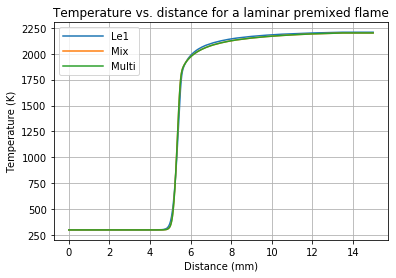

In [21]:
# plot the steady-state temperature profiles
fig, ax = plt.subplots()
ax.plot(flame1.grid*1000., flame1.T, label='Le1'  )
ax.plot(flame2.grid*1000., flame2.T, label='Mix'  )
ax.plot(flame3.grid*1000., flame3.T, label='Multi')
ax.set(xlabel='Distance (mm)',
       ylabel='Temperature (K)',
       title ='Temperature vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("T_vs_x_LPF.pdf")

At this scale, the profiles appear to be identical. Let's zoom in:

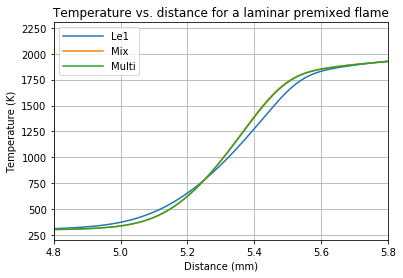

In [22]:
# plot the steady-state temperature profiles
fig, ax = plt.subplots()
ax.plot(flame1.grid*1000., flame1.T, label='Le1'  )
ax.plot(flame2.grid*1000., flame2.T, label='Mix'  )
ax.plot(flame3.grid*1000., flame3.T, label='Multi')
ax.set(xlim=(4.8,5.8),
       xlabel='Distance (mm)',
       ylabel='Temperature (K)',
       title ='Temperature vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("T_vs_x_LPF_zoom.pdf")

Now some differences can be seen between the unity-Lewis-number temperature profile and the temperature profiles for the two transport models that consider differential species diffusion. The latter models have a somewhat steeper temperature profile through the flame.

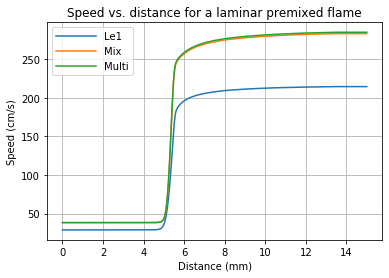

In [23]:
# plot the steady-state velocity profiles
fig, ax = plt.subplots()
ax.plot(flame1.grid*1000., flame1.u*100., label='Le1'  )
ax.plot(flame2.grid*1000., flame2.u*100., label='Mix'  )
ax.plot(flame3.grid*1000., flame3.u*100., label='Multi')
ax.set(xlabel='Distance (mm)',
       ylabel='Speed (cm/s)',
       title ='Speed vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("u_vs_x_LPF.pdf")

The lower flame speed for the unity-Lewis-number model is evident on the reactants side. As we saw in the previous tutorial Notebook, the difference in speed is amplified on the product side.

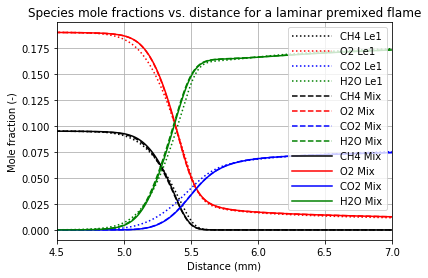

In [24]:
# plot steady-state major species mole-fraction profiles
X_CH4_1 = flame1.X[gas1.species_index('CH4')]
X_O2_1  = flame1.X[gas1.species_index('O2')]
X_H2O_1 = flame1.X[gas1.species_index('H2O')]
X_CO2_1 = flame1.X[gas1.species_index('CO2')]

X_CH4_2 = flame2.X[gas2.species_index('CH4')]
X_O2_2  = flame2.X[gas2.species_index('O2')]
X_H2O_2 = flame2.X[gas2.species_index('H2O')]
X_CO2_2 = flame2.X[gas2.species_index('CO2')]

X_CH4_3 = flame3.X[gas3.species_index('CH4')]
X_O2_3  = flame3.X[gas3.species_index('O2')]
X_H2O_3 = flame3.X[gas3.species_index('H2O')]
X_CO2_3 = flame3.X[gas3.species_index('CO2')]

fig, ax = plt.subplots()
ax.plot(flame1.grid*1000., X_CH4_1, ':',  label='CH4 Le1', color='black' )
ax.plot(flame1.grid*1000., X_O2_1,  ':',  label='O2 Le1',  color='red'   )
ax.plot(flame1.grid*1000., X_CO2_1, ':',  label='CO2 Le1', color='blue'  )
ax.plot(flame1.grid*1000., X_H2O_1, ':',  label='H2O Le1', color='green' )
ax.plot(flame2.grid*1000., X_CH4_2, '--', label='CH4 Mix', color='black' )
ax.plot(flame2.grid*1000., X_O2_2,  '--', label='O2 Mix',  color='red'   )
ax.plot(flame2.grid*1000., X_CO2_2, '--', label='CO2 Mix', color='blue'  )
ax.plot(flame2.grid*1000., X_H2O_2, '--', label='H2O Mix', color='green' )
ax.plot(flame3.grid*1000., X_CH4_3, '-',  label='CH4 Mix', color='black' )
ax.plot(flame3.grid*1000., X_O2_3,  '-',  label='O2 Mix',  color='red'   )
ax.plot(flame3.grid*1000., X_CO2_3, '-',  label='CO2 Mix', color='blue'  )
ax.plot(flame3.grid*1000., X_H2O_3, '-',  label='H2O Mix', color='green' )
ax.set(xlim=(4.5,7.0),
       xlabel='Distance (mm)',
       ylabel='Mole fraction (-)',
       title ='Species mole fractions vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("Xmajor_vs_x_LPF_zoom.pdf")

As was the case for the temperature profiles, some differences can be seen between the unity-Lewis-number model and the two models that consider differential species diffusion. Let's look at three low-molecular-weight species that we know can be especially important in combustion.

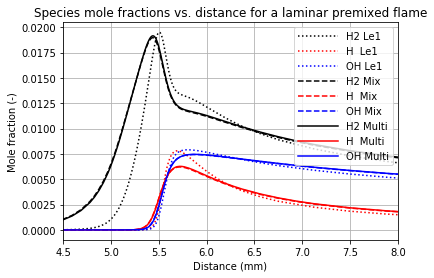

In [25]:
# plot steady-state minor species mole-fraction profiles
X_H2_1 = flame1.X[gas1.species_index('H2')]
X_H_1  = flame1.X[gas1.species_index('H')]
X_OH_1 = flame1.X[gas1.species_index('OH')]

X_H2_2 = flame2.X[gas2.species_index('H2')]
X_H_2  = flame2.X[gas2.species_index('H')]
X_OH_2 = flame2.X[gas2.species_index('OH')]

X_H2_3 = flame3.X[gas3.species_index('H2')]
X_H_3  = flame3.X[gas3.species_index('H')]
X_OH_3 = flame3.X[gas3.species_index('OH')]

fig, ax = plt.subplots()
ax.plot(flame1.grid*1000., X_H2_1, ':',  label='H2 Le1',   color='black')
ax.plot(flame1.grid*1000., X_H_1,  ':',  label='H  Le1',   color='red'  )
ax.plot(flame1.grid*1000., X_OH_1, ':',  label='OH Le1',   color='blue' )
ax.plot(flame2.grid*1000., X_H2_2, '--', label='H2 Mix',   color='black')
ax.plot(flame2.grid*1000., X_H_2,  '--', label='H  Mix',   color='red'  )
ax.plot(flame2.grid*1000., X_OH_2, '--', label='OH Mix',   color='blue' )
ax.plot(flame3.grid*1000., X_H2_3, '-',  label='H2 Multi', color='black')
ax.plot(flame3.grid*1000., X_H_3,  '-',  label='H  Multi', color='red'  )
ax.plot(flame3.grid*1000., X_OH_3, '-',  label='OH Multi', color='blue' )

ax.set(xlim=(4.5,8.0),
       xlabel='Distance (mm)',
       ylabel='Mole fraction (-)',
       title ='Species mole fractions vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("Xminor_vs_x_LPF_zoom.pdf")

The differences between the unity-Lewis-number results and those from the two models that consider differential species diffusion are more evident here, especially for H and H2. Let's look more closely at these two species, to see if we can spot any differences between the mixture-averaged diffusion model and the multicomponent diffusion model:



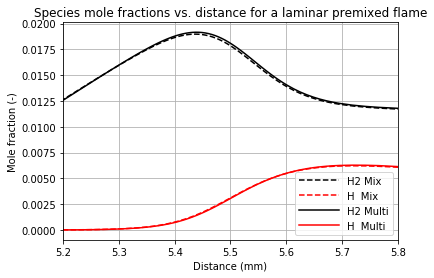

In [26]:
# plot steady-state H and H2 mole-fraction profiles for the two models that consider differential species diffusion
fig, ax = plt.subplots()
ax.plot(flame2.grid*1000., X_H2_2, '--', label='H2 Mix',   color='black')
ax.plot(flame2.grid*1000., X_H_2,  '--', label='H  Mix',   color='red'  )
ax.plot(flame3.grid*1000., X_H2_3, '-',  label='H2 Multi', color='black')
ax.plot(flame3.grid*1000., X_H_3,  '-',  label='H  Multi', color='red'  )

ax.set(xlim=(5.2,5.8),
       xlabel='Distance (mm)',
       ylabel='Mole fraction (-)',
       title ='Species mole fractions vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("H-H2_vs_x_LPF_zoom.pdf")

There are small differences, but we need to look closely to see them.

Finally, let's look at the heat-release-rate profiles:

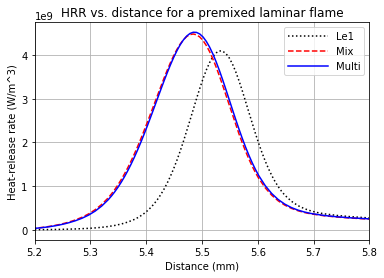

In [27]:
# plot the steady-state heat-release-rate profiles
fig, ax = plt.subplots()
ax.plot(flame1.grid*1000., flame1.heat_release_rate, ':',  label='Le1',   color='black')
ax.plot(flame2.grid*1000., flame2.heat_release_rate, '--', label='Mix',   color='red'  )
ax.plot(flame3.grid*1000., flame3.heat_release_rate, '-',  label='Multi', color='blue' )
ax.set(xlim=(5.2, 5.8),
       xlabel='Distance (mm)',
       ylabel='Heat-release rate (W/m^3)',
       title ='HRR vs. distance for a premixed laminar flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("HRR_vs_x_LPF_zoom.pdf")

Again, the main difference that can be seen is between the unity-Lewis-number model and the two models that consider differential species diffusion. And the main difference is a spatial shift in the heat-release profile, rather than a major difference in the profile shape.

These results suggest that differential diffusion effects might be even more important in hydrogen-fueled flames. We look at that next.

## 4. A hydrogen-air flame

In [28]:
# define the gas mixtures
gas4 = ct.Solution('gri30.cti')
gas5 = ct.Solution('gri30.cti')
gas6 = ct.Solution('gri30.cti')

In [29]:
# specify the unburned reactant mixture thermochemical state
# here we consider a stoichiometric mixture of H2 and air at ambient pressure and temperature
T_u  = 300.       # (K)
P_u  = ct.one_atm # (Pa)
fuel = 'H2'
air  = {'O2':1.0, 'N2':3.76}
phi  = 1.0

gas4.TP = T_u, P_u
gas4.set_equivalence_ratio(phi, fuel, air)

gas5.TP = T_u, P_u
gas5.set_equivalence_ratio(phi, fuel, air)

gas6.TP = T_u, P_u
gas6.set_equivalence_ratio(phi, fuel, air)

In [30]:
# specify the initial width of the 1D computational domain
width = 0.015 # (m)

# create the flame objects by filling the computational domain with the desired gas mixture
flame4 = ct.FreeFlame(gas4, width=width)
flame5 = ct.FreeFlame(gas5, width=width)
flame6 = ct.FreeFlame(gas6, width=width)

# specify numerical parameters used to control local grid refinement
flame4.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
flame5.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
flame6.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# specify the transport model to use for each flame
flame4.transport_model = "UnityLewis"
flame5.transport_model = "Mix"
flame6.transport_model = "Multi"

# specify the level of output desired
loglevel = 1

In [31]:
# solve flame 4
ctim0 = time.time()

flame4.solve(loglevel=loglevel, auto=False)

ctim1 = time.time()
ctime = ctim1 - ctim0
ctfl4 = ctime

S_L4 = flame4.u[0]
print("Flame Speed is: {:.2f} m/s. Simulation took {:.2f} s".format(S_L4,ctime))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.746e-06      7.223
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001216      4.995
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve H H2 H2O H2O2 HNO HO2 N N2 N2O NNH NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.271e-05      5.817
Attempt Newton solution of 

In [32]:
# solve flame 5
ctim0 = time.time()

flame5.solve(loglevel=loglevel, auto=False)

ctim1 = time.time()
ctime = ctim1 - ctim0
ctfl5 = ctime

S_L5 = flame5.u[0]
print("Flame Speed is: {:.2f} m/s. Simulation took {:.2f} s".format(S_L5,ctime))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.746e-06      7.161
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001216      5.205
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve H H2 H2O H2O2 HO2 N N2 N2O NNH NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709       4.96
Attempt Newton solution of stea

In [33]:
# solve flame 6
ctim0 = time.time()

flame6.solve(loglevel=loglevel, auto=False)

ctim1 = time.time()
ctime = ctim1 - ctim0
ctfl6 = ctime

S_L6 = flame6.u[0]
print("Flame Speed is: {:.2f} m/s. Simulation took {:.2f} s".format(S_L6,ctime))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.746e-06       7.19
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001216      5.139
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve H H2 H2O H2O2 HO2 N N2 N2O NNH NO NO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709       5.01
Attempt Newton solution of stea

In [34]:
# print the three flame speeds (m/s)
S_L4 , S_L5 , S_L6

(1.6733597741079356, 2.3475441255632727, 2.29542878418944)

Note that the laminar flame speeds for H2 fuel are significantly higher than those for hydrocarbon fuels. As before, the flame speeds for the two cases that consider differential species diffusion are equal to two significant figures, and the flame speed for the unity-Lewis-number case is approximately 25% lower.

In [35]:
# print the computational times required (s)
ctfl4 , ctfl5 , ctfl6

(4.620271682739258, 5.5900068283081055, 25.22705578804016)

In this case, the unity-Lewis-number model requires less computational time than the mixture-averaged model. And the multicomponent diffusion model requires approximately four times the computational time of the mixture-averaged diffusion model.

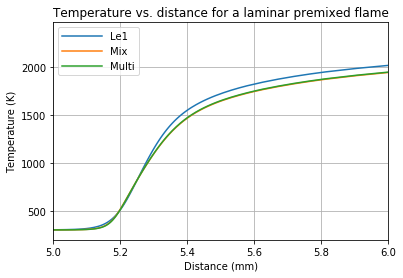

In [36]:
# plot the steady-state temperature profiles
fig, ax = plt.subplots()
ax.plot(flame4.grid*1000., flame4.T, label='Le1'  )
ax.plot(flame5.grid*1000., flame5.T, label='Mix'  )
ax.plot(flame6.grid*1000., flame6.T, label='Multi')
ax.set(xlim=(5.0,6.0),
       xlabel='Distance (mm)',
       ylabel='Temperature (K)',
       title ='Temperature vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("T_vs_x_H2_LPF_zoom.pdf")

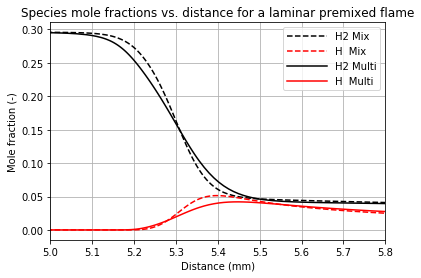

In [37]:
# plot steady-state H and H2 mole-fraction profiles for the two models that consider differential species diffusion
X_H2_4 = flame4.X[gas1.species_index('H2')]
X_H_4  = flame4.X[gas1.species_index('H')]
X_OH_4 = flame4.X[gas1.species_index('OH')]

X_H2_5 = flame5.X[gas2.species_index('H2')]
X_H_5  = flame5.X[gas2.species_index('H')]
X_OH_5 = flame5.X[gas2.species_index('OH')]

X_H2_6 = flame6.X[gas3.species_index('H2')]
X_H_6  = flame6.X[gas3.species_index('H')]
X_OH_6 = flame6.X[gas3.species_index('OH')]

fig, ax = plt.subplots()
ax.plot(flame4.grid*1000., X_H2_4, '--', label='H2 Mix',   color='black')
ax.plot(flame4.grid*1000., X_H_4,  '--', label='H  Mix',   color='red'  )
ax.plot(flame5.grid*1000., X_H2_5, '-',  label='H2 Multi', color='black')
ax.plot(flame5.grid*1000., X_H_5,  '-',  label='H  Multi', color='red'  )

ax.set(xlim=(5.0,5.8),
       xlabel='Distance (mm)',
       ylabel='Mole fraction (-)',
       title ='Species mole fractions vs. distance for a laminar premixed flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("H-H2_vs_x_H2_LPF_zoom.pdf")

Here we can see some differences between the mixture-averaged model and the multicomponent model.

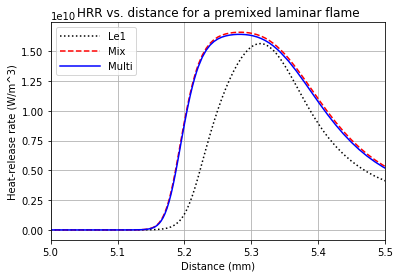

In [38]:
# plot the steady-state heat-release-rate profiles
fig, ax = plt.subplots()
ax.plot(flame4.grid*1000., flame4.heat_release_rate, ':',  label='Le1',   color='black')
ax.plot(flame5.grid*1000., flame5.heat_release_rate, '--', label='Mix',   color='red'  )
ax.plot(flame6.grid*1000., flame6.heat_release_rate, '-',  label='Multi', color='blue' )
ax.set(xlim=(5.0, 5.5),
       xlabel='Distance (mm)',
       ylabel='Heat-release rate (W/m^3)',
       title ='HRR vs. distance for a premixed laminar flame')
ax.grid(True)
ax.legend(handlelength=4,loc='best')
fig.savefig("HRR_vs_x_LPF_H2_zoom.pdf")

In this case, the overall shapes of the profiles are different between the unity-Lewis-number model and the two other models. And again, the differences between the two models that consider differential species diffusion are small, but are discernible.

## 5. What's next

While we haven't done an exhaustive study on the influence of the molecular transport model on laminar premixed flame speed and flame structure structure, we can draw two key conclusions: 

* Differential species diffusion can be important in laminar premixed flames, especially when there is a large difference between the molecular weights of the fuel and the oxidizer (e.g., H2 fuel and air oxidizer).

* A mixture-averaged diffusion model gives results that are essentially the same as those from a full multicomponent diffusion model. This will not always be the case, but for our purposes, a mixture-averaged diffusion model will be sufficient as we progress through the remainder of Turns 4th ed. That is good news, as a full multicomponent diffusion model is computationally expensive, and becomes rapidly more so as the number of species increases.

Finally, we note that we have not considered species diffusion mechanisms beyond ordinary species diffusion (see Chapter 7). Again, this will be satisfactory for our purposes going forward. 